# Common Practice : Decision Trees

## Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Load and visualize the dataset

In [2]:
data = pd.read_csv('Campus_Selection.csv')
data.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed


# Data Preprocessing

### Convert categorical variables into numerical using LabelEncoder

In [3]:
label_encoders = {}
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


### Define Features and Target Variable

In [4]:
features = data.columns[:-1] 
target_variable = 'status'

### Split Data into Train and Test Sets

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target_variable], test_size=0.2, random_state=32)

### Training Decision Tree Model with hyperparameters

In [7]:
# Train a raw Decision Tree model
dt_raw = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
dt_raw.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

# Model Evaluation

### Evaluate Model Performance on Training Data

In [13]:
train_pred_proba = dt_raw.predict_proba(X_train)
train_pred = dt_raw.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_logloss = log_loss(y_train, train_pred_proba)
train_auc = roc_auc_score(y_train, train_pred_proba[:, 1])

print(f"Training Accuracy (raw data): {train_accuracy:.4f}")
print(f"Training LogLoss (raw data): {train_logloss:.4f}")
print(f"Training AUC (raw data): {train_auc:.4f}")

Training Accuracy (raw data): 0.9186
Training LogLoss (raw data): 0.1955
Training AUC (raw data): 0.9690


### Evaluate Model Performance on Testing Data

In [11]:
test_pred_proba = dt_raw.predict_proba(X_test)
test_pred = dt_raw.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
test_logloss = log_loss(y_test, test_pred_proba)
test_auc = roc_auc_score(y_test, test_pred_proba[:, 1])

print(f"Testing Accuracy (raw data): {test_accuracy:.4f}")
print(f"Testing LogLoss (raw data): {test_logloss:.4f}")
print(f"Testing AUC (raw data): {test_auc:.4f}")

Testing Accuracy (raw data): 0.7907
Testing LogLoss (raw data): 1.9817
Testing AUC (raw data): 0.8267


### Confusion Matrix

In [12]:
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, test_pred))

Confusion Matrix (Test Data):
[[ 7  4]
 [ 5 27]]


### Visualize Trained Decision Tree

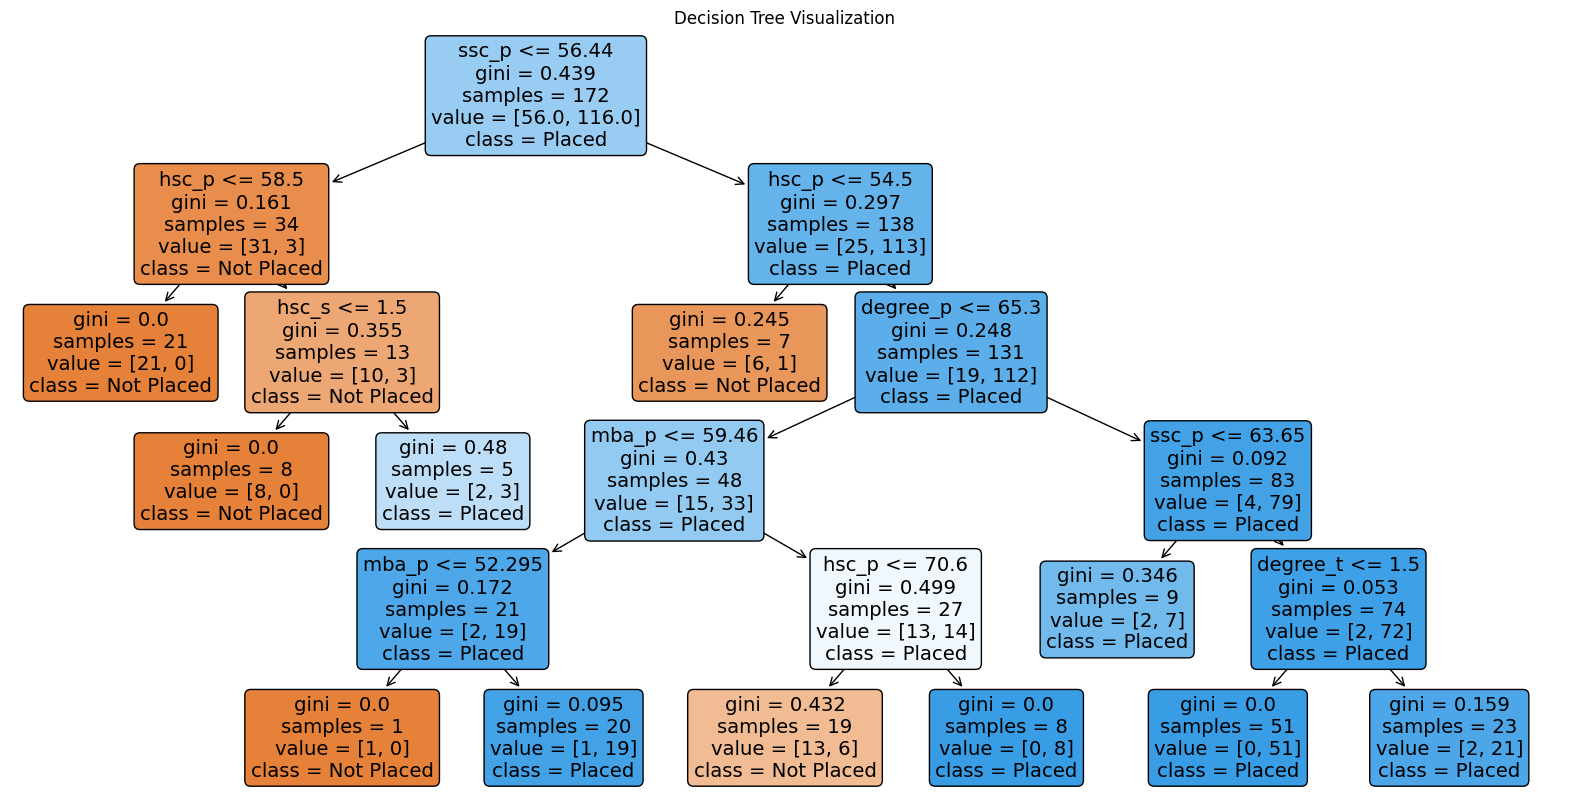

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_raw, feature_names=features, class_names=['Not Placed', 'Placed'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


### Generate and Plot ROC Curve

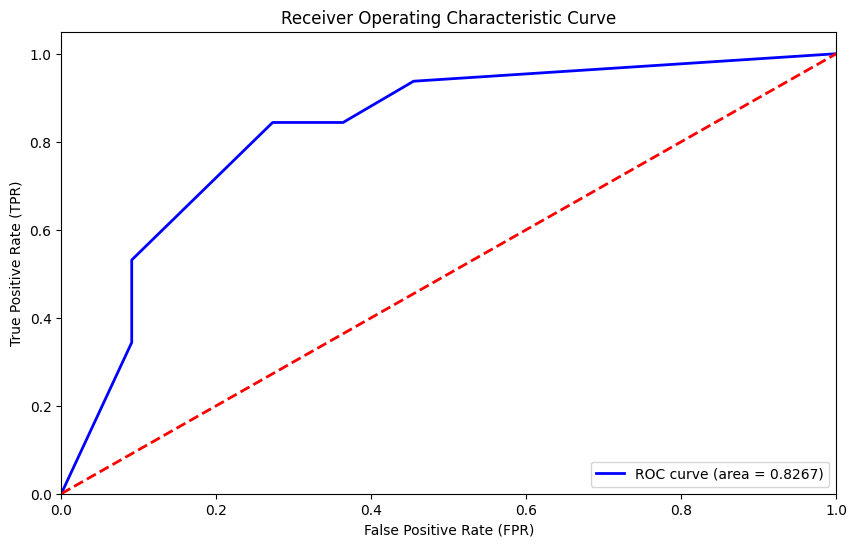

In [10]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, confusion_matrix, roc_curve, auc
import numpy as np

# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()